# Predict-Workers-Absent-Using-Logistic-regression

[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)

This machine learning is made for Data Science Couse project. in this project we are responsible for providing recommendations to HR team, analyze workers behaviour's to enhance company business performance. 

[![365 Careers](https://365careers.com/wp-content/uploads/2020/06/1146bd_c9b77ccbf6284db7a426bea0fe02ba87_mv2.png)](https://365careers.com/)

## Work Environment
We uses a number of open source projects to work properly:
- Tools
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)
[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Naereen/badges)


- Programming Language 
[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)


- Dataset 
[Employee Absenteeism prediction](https://www.kaggle.com/datasets/ayushi21095/employee-absenteeism-prediction")

## Workflow
- Load Dataset
- Handling Missing and Duplicated Values
- Preprocessing
- Explaratory Data Analysis (EDA)
- Standarize data
- Split Data
- Logistic Regression
- Feature Importance
- Test Model
- Recommendation


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.proportion as sp
import scipy.stats as st

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))
    
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

## Load Dataset

In [3]:
absent_data = pd.read_csv('Absenteeism-data.csv')
absent_data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [4]:
df = absent_data.copy()

## Handling missing and duplicated values

In [5]:
df.isnull().sum()

ID                           0
Reason for Absence           0
Date                         0
Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
dtype: int64

In [6]:
df.duplicated().sum()

8

There are 8 duplicated values

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().any()

False

## Preprocessing

In [9]:
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [10]:
df = df.drop(columns = 'ID')

In [11]:
df['Reason_1'] = np.where((df['Reason for Absence'] >= 1) & (df['Reason for Absence'] <= 14),1,0)
df['Reason_2'] = np.where((df['Reason for Absence'] >= 15) & (df['Reason for Absence'] <= 17),1,0)
df['Reason_3'] = np.where((df['Reason for Absence'] >= 18) & (df['Reason for Absence'] <= 21),1,0)
df['Reason_4'] = np.where((df['Reason for Absence'] >= 22),1,0)

- Reason 1 is for disease reasons
- Reason 2 is for Pregnancy reasons
- Reason 3 is for Poisoning reasons
- Reason 4 is for medical check up reasons

In [12]:
df.drop(columns='Reason for Absence')

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,23/05/2018,179,22,40,237.656,22,2,2,0,8,1,0,0,0
696,23/05/2018,225,26,28,237.656,24,1,1,2,3,1,0,0,0
697,24/05/2018,330,16,28,237.656,25,2,0,0,8,1,0,0,0
698,24/05/2018,235,16,32,237.656,25,3,0,0,2,0,0,0,1


In [13]:
column_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
                'Daily Work Load Average', 'Body Mass Index', 'Education',
                'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason_1',
                'Reason_2', 'Reason_3', 'Reason_4']

column_names_reordered = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 
                          'Date', 'Transportation Expense', 'Distance to Work', 'Age',
                          'Daily Work Load Average', 'Body Mass Index', 'Education',
                          'Children', 'Pets', 'Absenteeism Time in Hours']

df = df[column_names_reordered]
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [14]:
df_reason = df.copy()

In [15]:
df_reason = df_reason.drop(['Date'], axis = 1)
df_reason.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,289,36,33,239.554,30,1,2,1,2


## Create Targets

In [16]:
df_reason['Excessive Absenteeism'] = np.where(df_reason['Absenteeism Time in Hours'] >
                                              df_reason['Absenteeism Time in Hours'].median(),1,0)

In [17]:
data_with_target = df_reason.drop(columns='Absenteeism Time in Hours')

In [18]:
data_with_target

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,289,36,33,239.554,30,1,2,1,1
1,0,0,0,0,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,179,51,38,239.554,31,1,0,0,0
3,1,0,0,0,279,5,39,239.554,24,1,2,0,1
4,0,0,0,1,289,36,33,239.554,30,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,179,22,40,237.656,22,2,2,0,1
696,1,0,0,0,225,26,28,237.656,24,1,1,2,0
697,1,0,0,0,330,16,28,237.656,25,2,0,0,1
698,0,0,0,1,235,16,32,237.656,25,3,0,0,0


## Exploratory Data Analysis (EDA)

In [19]:
data_with_target.groupby(['Excessive Absenteeism'])['Age'].count()

Excessive Absenteeism
0    373
1    319
Name: Age, dtype: int64

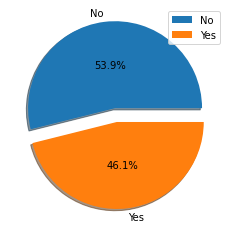

In [20]:
data = [373,319]
keys = ['No','Yes']
explode = [0, 0.2]
colors = sns.color_palette('dark')[0:5]
plt.pie(x=data, autopct="%.1f%%", labels=keys, pctdistance=0.5, explode=[0.08]*2, shadow= True, textprops={'weight': 'light'})

plt.legend()
plt.show()

Data is balance

In [21]:
yes = data_with_target[data_with_target['Excessive Absenteeism']==1]
no = data_with_target[data_with_target['Excessive Absenteeism']!=1]
no

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
1,0,0,0,0,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,179,51,38,239.554,31,1,0,0,0
4,0,0,0,1,289,36,33,239.554,30,1,2,1,0
5,0,0,0,1,179,51,38,239.554,31,1,0,0,0
13,1,0,0,0,179,51,38,239.554,31,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,0,0,0,0,378,49,36,237.656,21,1,2,4,0
691,0,1,0,0,179,22,40,237.656,22,2,2,0,0
696,1,0,0,0,225,26,28,237.656,24,1,1,2,0
698,0,0,0,1,235,16,32,237.656,25,3,0,0,0


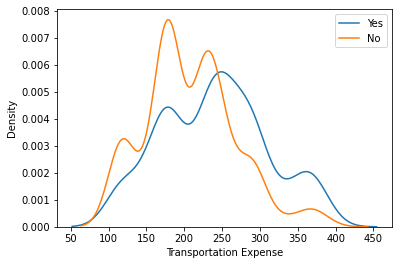

In [22]:
sns.kdeplot(yes['Transportation Expense'], label='Yes')
sns.kdeplot(no['Transportation Expense'], label='No')
plt.legend()
plt.show()

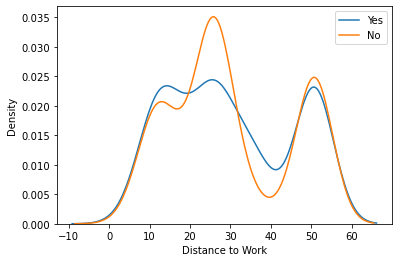

In [23]:
sns.kdeplot(yes['Distance to Work'], label='Yes')
sns.kdeplot(no['Distance to Work'], label='No')
plt.legend()
plt.show()

Distance to work doesn't effect people for Excessive Absent

<AxesSubplot:xlabel='Reason_4', ylabel='count'>

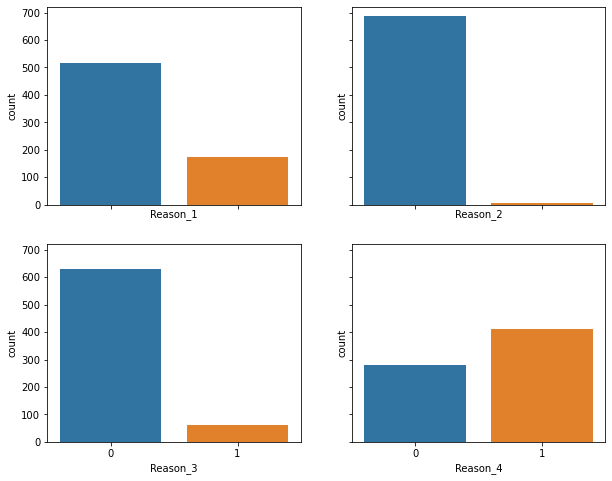

In [24]:
fig, axes = plt.subplots(2, 2, 
                         figsize=(10, 8), sharex=True, sharey=True)

sns.countplot(data_with_target['Reason_1'], ax=axes[0,0])
sns.countplot(data_with_target['Reason_2'], ax=axes[0,1])
sns.countplot(data_with_target['Reason_3'], ax=axes[1,0])
sns.countplot(data_with_target['Reason_4'], ax=axes[1,1])

the most reason to absent is for medical check up

## Standarize Data

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
data_with_target['Transportation Expense'] = StandardScaler().fit_transform(data_with_target['Transportation Expense'].values.reshape(len(df), 1))
data_with_target['Distance to Work'] = StandardScaler().fit_transform(data_with_target['Distance to Work'].values.reshape(len(df), 1))
data_with_target['Age'] = StandardScaler().fit_transform(data_with_target['Age'].values.reshape(len(df), 1))
data_with_target['Daily Work Load Average'] = StandardScaler().fit_transform(data_with_target['Daily Work Load Average'].values.reshape(len(df), 1))
data_with_target['Body Mass Index'] = StandardScaler().fit_transform(data_with_target['Body Mass Index'].values.reshape(len(df), 1))
data_with_target['Children'] = StandardScaler().fit_transform(data_with_target['Children'].values.reshape(len(df), 1))
data_with_target['Pets'] = StandardScaler().fit_transform(data_with_target['Pets'].values.reshape(len(df), 1))

In [27]:
data_with_target

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,0.998885,0.409831,-0.529189,-0.803696,0.774506,1,0.869872,0.260694,1
1,0,0,0,0,-1.582804,-1.147311,2.126691,-0.803696,1.010195,1,-0.028563,-0.594284,0
2,0,0,0,1,-0.661851,1.425359,0.251952,-0.803696,1.010195,1,-0.926998,-0.594284,0
3,1,0,0,0,0.847909,-1.688926,0.408180,-0.803696,-0.639631,1,0.869872,-0.594284,1
4,0,0,0,1,0.998885,0.409831,-0.529189,-0.803696,0.774506,1,0.869872,0.260694,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,-0.661851,-0.537995,0.564408,-0.851025,-1.111010,2,0.869872,-0.594284,1
696,1,0,0,0,0.032639,-0.267187,-1.310331,-0.851025,-0.639631,1,-0.028563,1.115673,0
697,1,0,0,0,1.617887,-0.944206,-1.310331,-0.851025,-0.403942,2,-0.926998,-0.594284,1
698,0,0,0,1,0.183615,-0.944206,-0.685418,-0.851025,-0.403942,3,-0.926998,-0.594284,0


## Split Data

In [28]:
X = data_with_target.drop(columns='Excessive Absenteeism')
y = data_with_target['Excessive Absenteeism'] # target / label

In [29]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=666)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_train)
eval_classification(LR, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.73
Recall (Test Set): 0.69
F1-Score (Test Set): 0.71
AUC: 0.78


In [31]:
print('Train score: ' + str(LR.score(X_train, y_train))) #accuracy
print('Test score:' + str(LR.score(X_test, y_test))) #accuracy

Train score: 0.7703435804701627
Test score:0.762589928057554


In [32]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
LR = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
LR_tuned = RandomizedSearchCV(LR, hyperparameters, cv=5, random_state=666, scoring='accuracy')

# Fitting Model & Evaluation
LR_tuned.fit(X_train, y_train)
y_pred = LR_tuned.predict(X_test)
eval_classification(LR_tuned, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.62
Precision (Test Set): 0.59
Recall (Test Set): 0.32
F1-Score (Test Set): 0.42
AUC: 0.69


In [33]:
print('Best algorithm:', LR_tuned.best_estimator_.get_params()['penalty'])
print('Best C:', LR_tuned.best_estimator_.get_params()['C'])

Best algorithm: l2
Best C: 0.002


In [34]:
print('Train score: ' + str(LR_tuned.score(X_train, y_train))) #accuracy
print('Test score:' + str(LR_tuned.score(X_test, y_test))) #accuracy

Train score: 0.6690777576853526
Test score:0.6187050359712231


Hyperparameter tuning doesn't give any effect to the model, so we decided not to do hyperparameter tuning

## Choosing feature Importance

In [37]:
unscaled_inputs = data_with_target.iloc[:,:-1]
feature_name = unscaled_inputs.columns.values

In [42]:
LR.coef_

array([[ 2.83505012,  0.49670359,  3.01791481,  0.9158601 ,  0.68223143,
        -0.11934618, -0.26348309, -0.01686739,  0.29075129, -0.10295797,
         0.39190455, -0.35767499]])

In [43]:
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)

summary_table['Coefficient'] = np.transpose(LR.coef_)

summary_table

,Feature name,Coefficient
0,Reason_1,2.835050
1,Reason_2,0.496704
2,Reason_3,3.017915
3,Reason_4,0.915860
4,Transportation Expense,0.682231
5,Distance to Work,-0.119346
6,Age,-0.263483
7,Daily Work Load Average,-0.016867
8,Body Mass Index,0.290751
9,Education,-0.102958


In [44]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', LR.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficient
0,Intercept,-1.535172
1,Reason_1,2.835050
2,Reason_2,0.496704
3,Reason_3,3.017915
4,Reason_4,0.915860
5,Transportation Expense,0.682231
6,Distance to Work,-0.119346
7,Age,-0.263483
8,Daily Work Load Average,-0.016867
9,Body Mass Index,0.290751


In [45]:
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)
summary_table.sort_values('Odds_ratio', ascending=False)

,Feature name,Coefficient,Odds_ratio
3,Reason_3,3.017915,20.448608
1,Reason_1,2.835050,17.031254
4,Reason_4,0.915860,2.498924
5,Transportation Expense,0.682231,1.978287
2,Reason_2,0.496704,1.643295
11,Children,0.391905,1.479796
9,Body Mass Index,0.290751,1.337432
8,Daily Work Load Average,-0.016867,0.983274
10,Education,-0.102958,0.902165
6,Distance to Work,-0.119346,0.887501


`Daily Work Load Average`, `Education`, and `Distance to Work` is the closest to 0, so we will drop those features

In [46]:
X = data_with_target.drop(columns=['Excessive Absenteeism','Daily Work Load Average','Education','Distance to Work'])
y = data_with_target['Excessive Absenteeism'] # target / label

In [47]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
from sklearn.linear_model import LogisticRegression
best_model = LogisticRegression(random_state=666)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
eval_classification(best_model, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.73
Recall (Test Set): 0.69
F1-Score (Test Set): 0.71
AUC: 0.78


In [49]:
print('Train score: ' + str(best_model.score(X_train, y_train))) #accuracy
print('Test score:' + str(best_model.score(X_test, y_test))) #accuracy

Train score: 0.7703435804701627
Test score:0.762589928057554


Model is good, best fit, no overfitting

In [50]:
import joblib

In [51]:
joblib.dump(best_model, 'Absent-Predictor.joblib')

['Absent-Predictor.joblib']

## Test Model

In [74]:
new_data = pd.read_csv('Absenteeism_new_data.csv')

In [75]:
df = new_data.copy()

In [76]:
df = df.drop(columns = ['Date','ID'])
df['Reason_1'] = np.where((df['Reason for Absence'] >= 1) & (df['Reason for Absence'] <= 14),1,0)
df['Reason_2'] = np.where((df['Reason for Absence'] >= 15) & (df['Reason for Absence'] <= 17),1,0)
df['Reason_3'] = np.where((df['Reason for Absence'] >= 18) & (df['Reason for Absence'] <= 21),1,0)
df['Reason_4'] = np.where((df['Reason for Absence'] >= 22),1,0)

In [77]:
column_names = ['Transportation Expense', 'Distance to Work', 'Age',
                'Daily Work Load Average', 'Body Mass Index', 'Education',
                'Children', 'Pets', 'Reason_1',
                'Reason_2', 'Reason_3', 'Reason_4']

column_names_reordered = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 
                           'Transportation Expense', 'Distance to Work', 'Age',
                          'Daily Work Load Average', 'Body Mass Index', 'Education',
                          'Children', 'Pets']

df = df[column_names_reordered]
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,0,0,0,1,179,26,30,237.656,19,3,0,0
1,1,0,0,0,361,52,28,237.656,27,1,1,4
2,0,0,0,1,155,12,34,237.656,25,1,2,0
3,0,0,0,1,179,22,40,237.656,22,2,2,0
4,1,0,0,0,155,12,34,237.656,25,1,2,0


In [78]:
from sklearn.preprocessing import StandardScaler
df['Transportation Expense'] = StandardScaler().fit_transform(df['Transportation Expense'].values.reshape(len(df), 1))
df['Distance to Work'] = StandardScaler().fit_transform(df['Distance to Work'].values.reshape(len(df), 1))
df['Age'] = StandardScaler().fit_transform(df['Age'].values.reshape(len(df), 1))
df['Daily Work Load Average'] = StandardScaler().fit_transform(df['Daily Work Load Average'].values.reshape(len(df), 1))
df['Body Mass Index'] = StandardScaler().fit_transform(df['Body Mass Index'].values.reshape(len(df), 1))
df['Children'] = StandardScaler().fit_transform(df['Children'].values.reshape(len(df), 1))
df['Pets'] = StandardScaler().fit_transform(df['Pets'].values.reshape(len(df), 1))

In [79]:
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,0,0,0,1,-0.326675,0.064835,-0.877958,-2.227361,-1.419428,3,-1.187282,-0.660387
1,1,0,0,0,2.097580,1.839269,-1.127910,-2.227361,0.294598,1,0.030443,0.827808
2,0,0,0,1,-0.646357,-0.890629,-0.378053,-2.227361,-0.133908,1,1.248168,-0.660387
3,0,0,0,1,-0.326675,-0.208155,0.371804,-2.227361,-0.776668,2,1.248168,-0.660387
4,1,0,0,0,-0.646357,-0.890629,-0.378053,-2.227361,-0.133908,1,1.248168,-0.660387


In [80]:
df = df.drop(['Education','Daily Work Load Average','Distance to Work'],axis=1)

In [81]:
model = joblib.load('Absent-Predictor.joblib')
predictions = model.predict(df)
probability = model.predict_proba(df)[:,1]

In [82]:
a = pd.DataFrame(probability, columns=['Probability'])
b = pd.DataFrame(predictions, columns=['Predictions'])

In [83]:
b.shape

(40, 1)

In [84]:
new_data = pd.concat([new_data, a, b], axis = 1)


In [85]:
new_data

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Probability,Predictions
0,22,27,01/06/2018,179,26,30,237.656,19,3,0,0,0.194962,0
1,10,7,04/06/2018,361,52,28,237.656,27,1,1,4,0.931391,1
2,14,23,06/06/2018,155,12,34,237.656,25,1,2,0,0.402260,0
3,17,25,08/06/2018,179,22,40,237.656,22,2,2,0,0.367058,0
4,14,10,08/06/2018,155,12,34,237.656,25,1,2,0,0.821428,1
5,28,11,11/06/2018,225,26,28,237.656,24,1,1,2,0.817374,1
6,16,7,13/06/2018,118,15,46,275.089,25,1,2,0,0.701385,1
7,22,27,13/06/2018,179,26,30,275.089,19,3,0,0,0.194962,0
8,34,26,15/06/2018,118,10,37,275.089,28,1,0,0,0.167579,0
9,34,10,20/06/2018,118,10,37,275.089,28,1,0,0,0.579136,1


In [90]:
new_data.groupby(['Predictions'])['ID'].count()

Predictions
0    19
1    21
Name: ID, dtype: int64

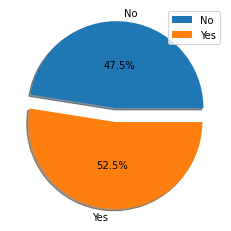

In [91]:
data = [19,21]
keys = ['No','Yes']
explode = [0, 0.2]
colors = sns.color_palette('dark')[0:5]
plt.pie(x=data, autopct="%.1f%%", labels=keys, pctdistance=0.5, explode=[0.08]*2, shadow= True, textprops={'weight': 'light'})

plt.legend()
plt.show()

## Recommendation

#### This model can predict there is 6% more workers that will take excessive absent from their work
- we can make sports day for workers to remind them to always take care of their health
- apply hybrid working environment, to make different working environment, for better productivities. Studies have proven that hybrid working increases productivity, source: [here](https://academic.oup.com/qje/article-abstract/130/1/165/2337855)
- Give tips to eat healthier


# Thank You!!!